In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pedigree as pd 

# Pedigree's loading

In [2]:
ped = pd.Pedigree()
ped.load('../data/fam9.ped')
for people in ped.get_pedigree().values():
    print(people)

[9 1 0 0 0 {'10', '6', '8', '4'}]
[9 2 0 0 0 {'10', '6', '8', '4'}]
[9 3 0 0 0 {'12', '13', '11'}]
[9 4 2 1 0 {'12', '13', '11'}]
[9 5 0 0 0 {'15', '14', '16'}]
[9 6 2 1 0 {'15', '14', '16'}]
[9 7 0 0 0 {'17', '18', '19'}]
[9 8 2 1 0 {'17', '18', '19'}]
[9 9 0 0 0 {'22', '20', '21'}]
[9 10 2 1 0 {'22', '20', '21'}]
[9 11 3 4 0 set()]
[9 12 3 4 0 set()]
[9 13 3 4 0 set()]
[9 14 6 5 0 set()]
[9 15 6 5 0 set()]
[9 16 6 5 0 set()]
[9 17 8 7 0 set()]
[9 18 8 7 0 set()]
[9 19 8 7 0 set()]
[9 20 9 10 0 set()]
[9 21 9 10 0 set()]
[9 22 9 10 0 set()]


# Bayesien Networks Generation's

In [3]:
def createInd(bn,p):
    bn.add(gum.LabelizedVariable(f"matX{p.pID}",f"mother of {p.pID}",["0","1"]))
    bn.add(gum.LabelizedVariable(f"fatX{p.pID}",f"father of {p.pID}",["0","1"]))
    bn.add(gum.LabelizedVariable(f"X{p.pID}",f"{p.pID}",["00","01","10","11"]))
    bn.addArc(f"fatX{p.pID}",f"X{p.pID}")
    bn.addArc(f"matX{p.pID}",f"X{p.pID}")
    #gnb.showPotential(bn.cpt(f"X{p.pID}").fillWith([1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1]))

In [66]:
def joindreParent(bn,p,parent):
    #parent = fat ou mat
    if parent == 'fat':
        parentID = p.fatID
    else:
        parentID = p.matID
    
    #Creating Selector 
    bn.add(gum.LabelizedVariable(f"S{parent}{p.pID}",f"Selector of {parent}ID",["fat","mat"]))
    bn.cpt(f"S{parent}{p.pID}").fillWith([0.5,0.5])
    
    bn.addArc(f"X{parentID}",f"{parent}X{p.pID}") # parent to child
    bn.addArc(f"S{parent}{p.pID}",f"{parent}X{p.pID}") # Selector to fat/mat

    #gnb.showPotential(bn.cpt(f"{parent}X{p.pID}").fillWith([1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1]))
    bn.cpt(f"{parent}X{p.pID}").fillWith([1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1])

In [67]:
def bn(ped,f):
    bn = gum.BayesNet()
    for p in ped.get_pedigree().values():
        createInd(bn,p)
        
        if p.fatID == '0': # Cas parents inconnu
            bn.cpt(f"fatX{p.pID}").fillWith([1-f,f])
        else: 
            joindreParent(bn,p,'fat')
        
        if p.matID == '0': # Cas parents inconnu
            bn.cpt(f"matX{p.pID}").fillWith([1-f,f])
        else:
            joindreParent(bn,p,'mat')
        
        
    gnb.showBN(bn,size=100)

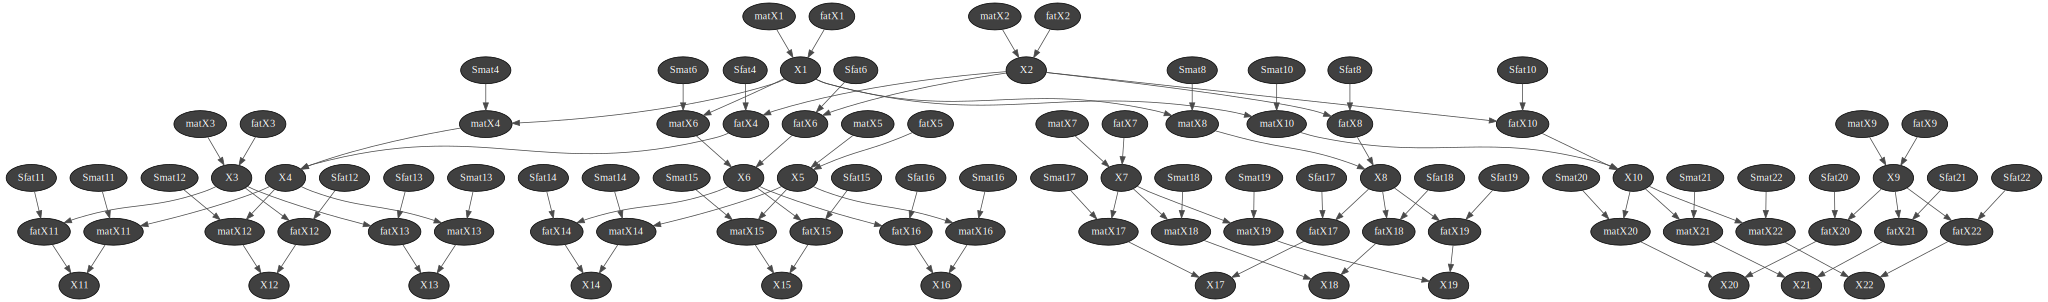

In [68]:
bn(ped,0.05)

In [ ]:
    #1 ; creeInd() : X,fatX,patX + cpt(x) X=00 si fat=0 et mat=0 .... X=11 si fat=1 et mat=1 : P(X|mat,pat)=1 si X=mat pat et 0 sinon
        #2 : if papa alors joindrePapa : SfatX + cpt(fatX) sinon: cpt(fatX,f) [1-f,f]
        #3 : if maman alors joindreMaman : SmatX + cpt(matX) sinon: cpt(matX,f) [1-f,f]

In [58]:
def bn(ped,f):
    print("eeee")
    bn=gum.BayesNet()
    for p in ped.get_pedigree().values():
        if p.fatID == '0' and p.matID == '0': # Cas parents inconnu
            bn.add(gum.LabelizedVariable(f"mat{p.pID}",f"mother of {p.pID}",["0","1"]))
            bn.add(gum.LabelizedVariable(f"fat{p.pID}",f"father of {p.pID}",["0","1"]))
            bn.add(gum.LabelizedVariable(f"X{p.pID}",f"{p.pID}",["00","01","10","11"]))
            bn.addArc(f"fat{p.pID}",f"X{p.pID}")
            bn.addArc(f"mat{p.pID}",f"X{p.pID}")
            bn.cpt(f"X{p.pID}").fillWith([(1-f)**2,f*(1-f),f*(1-f),f**2]*4)
        else:
# #             bn.add(gum.LabelizedVariable(f"mat{p.matID}",f"mother of {p.pID}",["0","1"]))
# #             bn.add(gum.LabelizedVariable(f"fat{p.fatID}",f"father of {p.pID}",["0","1"]))
#             bn.add(gum.LabelizedVariable(f"Sk{p.matID}",f"Selector of {p.matID}",["0","1"]))
#             bn.add(gum.LabelizedVariable(f"Sk{p.fatID}",f"Selector of {p.fatID}",["0","1"]))
            bn.add(gum.LabelizedVariable(f"X{p.pID}",f"{p.pID}",["00","01","10","11"]))
            bn.addArc(f"X{p.matID}",f"X{p.pID}")
            bn.addArc(f"X{p.fatID}",f"X{p.pID}")
            
    #gnb.showPotential('X1')
    gnb.showBN(bn,size=100)

eeee


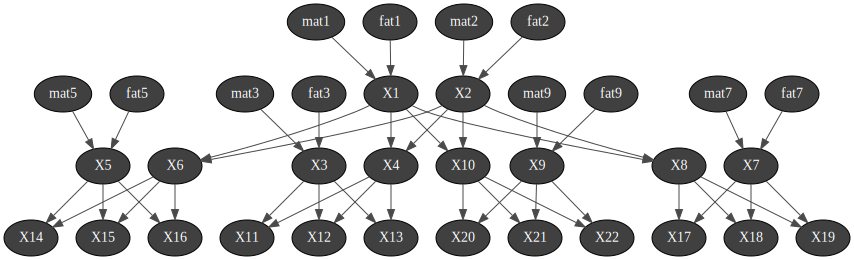

In [59]:
bn(ped,0.05)

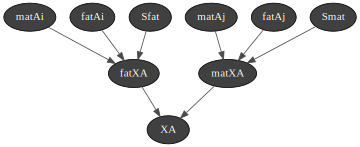

In [33]:
bn=gum.BayesNet()
bn.add(gum.LabelizedVariable("matAi","mother of A",["0","1"]))
bn.add(gum.LabelizedVariable("fatAi","father of A",["0","1"]))
bn.add(gum.LabelizedVariable(f"Sfat",f"Selector of fatID",["0","1"]))

bn.add(gum.LabelizedVariable("matAj","mother of A",["0","1"]))
bn.add(gum.LabelizedVariable("fatAj","father of A",["0","1"]))
bn.add(gum.LabelizedVariable(f"Smat",f"Selector of matID",["0","1"]))

bn.add(gum.LabelizedVariable("fatXA","fat allele of A",["0","1"]))
bn.add(gum.LabelizedVariable("matXA","mat allele of A",["0","1"]))

bn.add(gum.LabelizedVariable("XA","A",["00","01","10","11"]))

bn.cpt("Sfat").fillWith([0.5,0.5])
bn.cpt("Smat").fillWith([0.5,0.5])

bn.addArc("fatAi","fatXA")
bn.addArc("matAi","fatXA")
bn.addArc("Sfat","fatXA")

bn.addArc("fatAj","matXA")
bn.addArc("matAj","matXA")
bn.addArc("Smat","matXA")

bn.addArc("fatXA","XA")
bn.addArc("matXA","XA")
f = 0.05
gnb.showPotential(bn.cpt("fatXA").fillWith([1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1]))
gnb.showPotential(bn.cpt("matXA").fillWith([1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1]))
#gnb.showPotential(bn.cpt("XA").fillWith([(1-f)**2,0,0,0,0,f*(1-f),f*(1-f),0,0,f*(1-f),f*(1-f),0,0,0,0,f**2]))

gnb.showBN(bn)

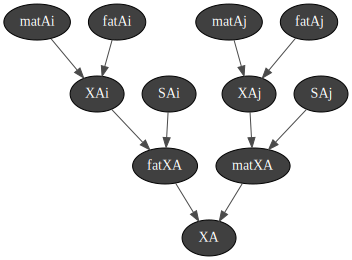

In [34]:
bn=gum.BayesNet()
bn.add(gum.LabelizedVariable("matAi","mother of A",["0","1"]))
bn.add(gum.LabelizedVariable("fatAi","father of A",["0","1"]))
bn.add(gum.LabelizedVariable("XAi","XAi",["00","01","10","11"]))
bn.add(gum.LabelizedVariable(f"SAi",f"Selector of fatID",["0","1"]))

bn.add(gum.LabelizedVariable("matAj","mother of A",["0","1"]))
bn.add(gum.LabelizedVariable("fatAj","father of A",["0","1"]))
bn.add(gum.LabelizedVariable("XAj","XAj",["00","01","10","11"]))
bn.add(gum.LabelizedVariable(f"SAj",f"Selector of matID",["0","1"]))

bn.add(gum.LabelizedVariable("fatXA","fat allele of A",["0","1"]))
bn.add(gum.LabelizedVariable("matXA","mat allele of A",["0","1"]))

bn.add(gum.LabelizedVariable("XA","A",["00","01","10","11"]))

bn.cpt("SAi").fillWith([0.5,0.5])
bn.cpt("SAj").fillWith([0.5,0.5])

bn.addArc("fatAi","XAi")
bn.addArc("matAi","XAi")
bn.addArc("SAi","fatXA")

bn.addArc("fatAj","XAj")
bn.addArc("matAj","XAj")
bn.addArc("SAj","matXA")

bn.addArc("XAi","fatXA")
bn.addArc("XAj","matXA")

bn.addArc("fatXA","XA")
bn.addArc("matXA","XA")

f = 0.05
gnb.showPotential(bn.cpt("fatXA").fillWith([1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1]))
gnb.showPotential(bn.cpt("matXA").fillWith([1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1]))
#gnb.showPotential(bn.cpt("XA").fillWith([(1-f)**2,0,0,0,0,f*(1-f),f*(1-f),0,0,f*(1-f),f*(1-f),0,0,0,0,f**2]))

gnb.showBN(bn)

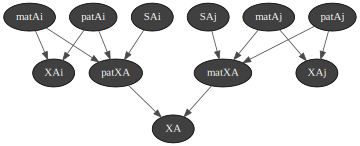

In [35]:
bn=gum.BayesNet()
bn.add(gum.LabelizedVariable("matAi","mother of A",["0","1"]))
bn.add(gum.LabelizedVariable("patAi","father of A",["0","1"]))
bn.add(gum.LabelizedVariable("XAi","XAi",["00","01","10","11"]))
bn.add(gum.LabelizedVariable(f"SAi",f"Selector of fatID",["0","1"]))

bn.add(gum.LabelizedVariable("matAj","mother of A",["0","1"]))
bn.add(gum.LabelizedVariable("patAj","father of A",["0","1"]))
bn.add(gum.LabelizedVariable("XAj","XAj",["00","01","10","11"]))
bn.add(gum.LabelizedVariable(f"SAj",f"Selector of matID",["0","1"]))

bn.add(gum.LabelizedVariable("patXA","pat allele of A",["0","1"]))
bn.add(gum.LabelizedVariable("matXA","mat allele of A",["0","1"]))

bn.add(gum.LabelizedVariable("XA","A",["00","01","10","11"]))

bn.cpt("SAi").fillWith([0.5,0.5])
bn.cpt("SAj").fillWith([0.5,0.5])

bn.addArc("patAi","XAi")
bn.addArc("matAi","XAi")
bn.addArc("SAi","patXA")

bn.addArc("patAj","XAj")
bn.addArc("matAj","XAj")
bn.addArc("SAj","matXA")

bn.addArc("patAi","patXA")
bn.addArc("matAi","patXA")

bn.addArc("patAj","matXA")
bn.addArc("matAj","matXA")

bn.addArc("patXA","XA")
bn.addArc("matXA","XA")

f = 0.05
gnb.showPotential(bn.cpt("patXA").fillWith([1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1]))
gnb.showPotential(bn.cpt("matXA").fillWith([1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1]))
#gnb.showPotential(bn.cpt("XA").fillWith([(1-f)**2,0,0,0,0,f*(1-f),f*(1-f),0,0,f*(1-f),f*(1-f),0,0,0,0,f**2]))

gnb.showBN(bn)